In [157]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
%matplotlib inline
plt.rcParams['figure.figsize'] = (16,11)

**Выведем случайный граф на 50 вершин** (для удобства расположим их по кругу):

Ребра графа в виде (V, V):

[(0, 39), (0, 36), (0, 46), (0, 43), (0, 10), (2, 39), (2, 34), (2, 17), (3, 33), (3, 18), (3, 29), (4, 27), (5, 39), (5, 40), (6, 30), (6, 22), (6, 45), (7, 35), (7, 18), (7, 31), (7, 46), (9, 34), (11, 28), (11, 43), (11, 47), (13, 26), (14, 35), (15, 48), (15, 35), (15, 42), (15, 39), (15, 49), (15, 23), (16, 37), (16, 21), (17, 45), (17, 24), (18, 33), (19, 24), (21, 37), (22, 28), (23, 48), (28, 37), (29, 43), (30, 49), (31, 39), (33, 37), (34, 36), (39, 49), (41, 47)]



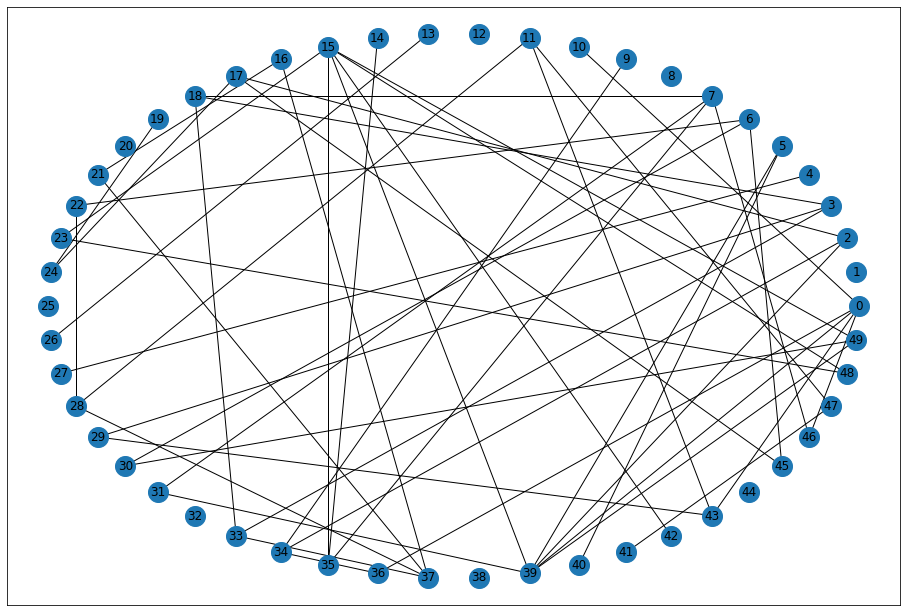

In [161]:
G = nx.gnm_random_graph(50, 50, seed=None, directed=False) # Тут генерируется случайный граф
pos = nx.circular_layout(G)
nx.draw_networkx(G, pos, node_size = 400)
print("Ребра графа в виде (V, V):\n")
print(G.edges)
print()

**Теперь постараемся найти все его элементарные циклы.
Для этого я написал алгоритм. Внешний цикл проверяет все узлы графика и запускает поиск из каждой вершины. Вершины соседние (по списку ребер) добавляются к циклу цикла. Рекурсия завершается, если не может быть добавлено больше не посещаемых соседей. Новый цикл найден, если путь длиннее двух узлов, а следующий сосед - это начало пути. Чтобы избежать повторяющихся циклов, циклы нормализуются поворотом наименьшей вершины до начала. Учитываются также циклы в обратном порядке.**

***Это довольно простая наивная реализация, алгоритм перебора. Безусловно, я его буду оптимизировать, у меня уже есть несколько идей, как это можно сделать именно для моей будущей задачи.***

In [162]:
graph = G.edges
cycles = []


def main():
    global graph
    global cycles
    for edge in graph:
        for v in edge:
            findNewCycles([v])
    for cy in cycles:
        generate_graph(cy)
        path = [str(v) for v in cy]
        s = "".join(path)
        print(s, end="\n")
        print()


def findNewCycles(path):
    start_v = path[0]
    next_v = None
    sub = []

    # Проходим по каждому ребру и по каждой вершине каждого ребра
    for edge in graph:
        v1, v2 = edge
        if start_v in edge:
            if v1 == start_v:
                next_v = v2
            else:
                next_v = v1
            if not visited(next_v, path):
                # Вершина-сосед еще не находится в нашем пути
                sub = [next_v]
                sub.extend(path)
                # Пройдем по только что расширенному (extend) пути
                findNewCycles(sub);
            elif len(path) > 2 and next_v == path[-1]:
                # ЦИКЛ НАЙДЕН!
                p = rotate_to_smallest(path);
                inv = invert(p)
                if isNew(p) and isNew(inv):
                    cycles.append(p)


def invert(path):
    return rotate_to_smallest(path[::-1])


#  Перевернем цикл так, чтобы он начинался с меньшей вершины
def rotate_to_smallest(path):
    n = path.index(min(path))
    return path[n:] + path[:n]


def isNew(path):
    return path not in cycles


def visited(v, path):
    return v in path

def generate_graph(V):
    size = len(V)
    V[1] = (V[0], V[1])
    V.pop(0)
    for i in range(1, size - 1):
        temp = (V[i-1][1], V[i])
        V[i] = temp
    V.append((V[-1][1], V[0][0]))


main()

(0, 36)(36, 34)(34, 2)(2, 39)(39, 0)

(0, 43)(43, 11)(11, 28)(28, 37)(37, 33)(33, 3)(3, 18)(18, 7)(7, 35)(35, 15)(15, 49)(49, 30)(30, 6)(6, 45)(45, 17)(17, 2)(2, 39)(39, 0)

(0, 43)(43, 29)(29, 3)(3, 18)(18, 7)(7, 35)(35, 15)(15, 49)(49, 30)(30, 6)(6, 45)(45, 17)(17, 2)(2, 39)(39, 0)

(0, 43)(43, 29)(29, 3)(3, 33)(33, 18)(18, 7)(7, 35)(35, 15)(15, 49)(49, 30)(30, 6)(6, 45)(45, 17)(17, 2)(2, 39)(39, 0)

(0, 43)(43, 11)(11, 28)(28, 37)(37, 33)(33, 18)(18, 7)(7, 35)(35, 15)(15, 49)(49, 30)(30, 6)(6, 45)(45, 17)(17, 2)(2, 39)(39, 0)

(0, 46)(46, 7)(7, 35)(35, 15)(15, 49)(49, 30)(30, 6)(6, 45)(45, 17)(17, 2)(2, 39)(39, 0)

(0, 43)(43, 11)(11, 28)(28, 22)(22, 6)(6, 45)(45, 17)(17, 2)(2, 39)(39, 0)

(0, 46)(46, 7)(7, 18)(18, 33)(33, 3)(3, 29)(29, 43)(43, 11)(11, 28)(28, 22)(22, 6)(6, 45)(45, 17)(17, 2)(2, 39)(39, 0)

(0, 46)(46, 7)(7, 18)(18, 3)(3, 29)(29, 43)(43, 11)(11, 28)(28, 22)(22, 6)(6, 45)(45, 17)(17, 2)(2, 39)(39, 0)

(0, 46)(46, 7)(7, 18)(18, 3)(3, 33)(33, 37)(37, 28)(28, 22)(22, 6)

**Расположим циклы в порядке убывания:**

In [163]:
cycles.sort(key=lambda n: 0 - len(n))
for cy in cycles:
        path = [str(v) for v in cy]
        s = "".join(path)
        print(s, end="\n")
        print()

(0, 36)(36, 34)(34, 2)(2, 17)(17, 45)(45, 6)(6, 22)(22, 28)(28, 11)(11, 43)(43, 29)(29, 3)(3, 33)(33, 18)(18, 7)(7, 35)(35, 15)(15, 49)(49, 39)(39, 0)

(0, 43)(43, 29)(29, 3)(3, 18)(18, 33)(33, 37)(37, 28)(28, 22)(22, 6)(6, 30)(30, 49)(49, 15)(15, 35)(35, 7)(7, 31)(31, 39)(39, 2)(2, 34)(34, 36)(36, 0)

(0, 43)(43, 11)(11, 28)(28, 37)(37, 33)(33, 3)(3, 18)(18, 7)(7, 31)(31, 39)(39, 15)(15, 49)(49, 30)(30, 6)(6, 45)(45, 17)(17, 2)(2, 34)(34, 36)(36, 0)

(0, 43)(43, 11)(11, 28)(28, 37)(37, 33)(33, 3)(3, 18)(18, 7)(7, 35)(35, 15)(15, 39)(39, 49)(49, 30)(30, 6)(6, 45)(45, 17)(17, 2)(2, 34)(34, 36)(36, 0)

(0, 36)(36, 34)(34, 2)(2, 17)(17, 45)(45, 6)(6, 22)(22, 28)(28, 11)(11, 43)(43, 29)(29, 3)(3, 33)(33, 18)(18, 7)(7, 35)(35, 15)(15, 39)(39, 0)

(0, 36)(36, 34)(34, 2)(2, 17)(17, 45)(45, 6)(6, 22)(22, 28)(28, 11)(11, 43)(43, 29)(29, 3)(3, 18)(18, 7)(7, 35)(35, 15)(15, 49)(49, 39)(39, 0)

(0, 46)(46, 7)(7, 18)(18, 33)(33, 3)(3, 29)(29, 43)(43, 11)(11, 28)(28, 22)(22, 6)(6, 30)(30, 49)(49, 15

**Оставим из всех циклов только цикл(ы) с максимальным количеством ребер. Назовем их максимальными циклами.**

In [164]:
# Найдем максимальный размер max_size существующих циклов:
max_size = 0
for cy in cycles:
    if len(cy) > max_size:
        max_size = len(cy)

# Найдем циклы с размером, равным max_size:
max_cycles = []
for i in range(len(cycles)):
        if len(cycles[i]) == max_size:
            max_cycles.append(cycles[i])
            path = [str(v) for v in cycles[i]]
            s = "".join(path)
            print(s, end="\n")

(0, 36)(36, 34)(34, 2)(2, 17)(17, 45)(45, 6)(6, 22)(22, 28)(28, 11)(11, 43)(43, 29)(29, 3)(3, 33)(33, 18)(18, 7)(7, 35)(35, 15)(15, 49)(49, 39)(39, 0)
(0, 43)(43, 29)(29, 3)(3, 18)(18, 33)(33, 37)(37, 28)(28, 22)(22, 6)(6, 30)(30, 49)(49, 15)(15, 35)(35, 7)(7, 31)(31, 39)(39, 2)(2, 34)(34, 36)(36, 0)
(0, 43)(43, 11)(11, 28)(28, 37)(37, 33)(33, 3)(3, 18)(18, 7)(7, 31)(31, 39)(39, 15)(15, 49)(49, 30)(30, 6)(6, 45)(45, 17)(17, 2)(2, 34)(34, 36)(36, 0)
(0, 43)(43, 11)(11, 28)(28, 37)(37, 33)(33, 3)(3, 18)(18, 7)(7, 35)(35, 15)(15, 39)(39, 49)(49, 30)(30, 6)(6, 45)(45, 17)(17, 2)(2, 34)(34, 36)(36, 0)


**Выделим эти циклы на исходном графе:**

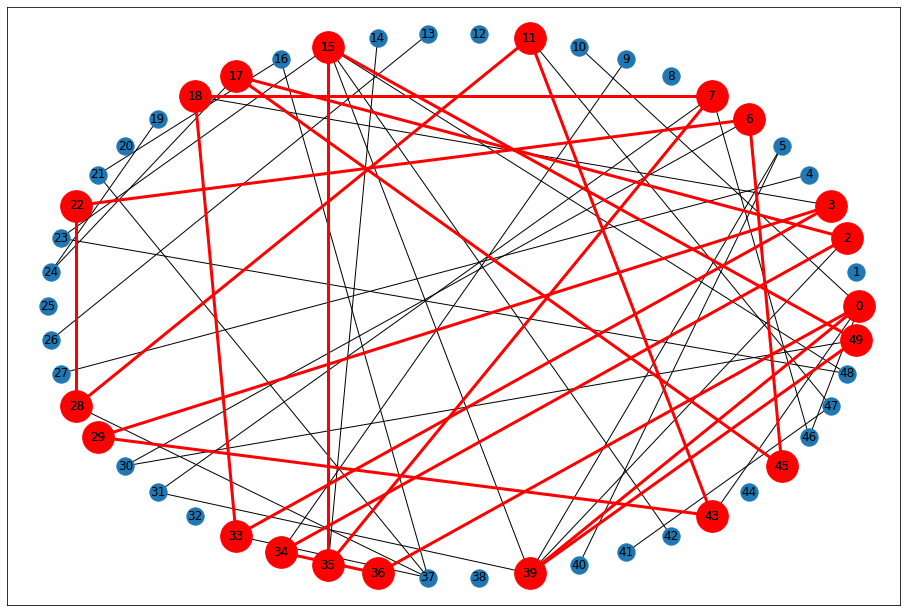

In [165]:
Cycles_graph = nx.Graph()
Cycles_graph.add_edges_from(max_cycles[0])
pos = nx.circular_layout(G) 
nx.draw_networkx(G, pos)
nx.draw_networkx(Cycles_graph, pos, edge_color='r', width = 3, node_color = 'r', node_size = 1000)

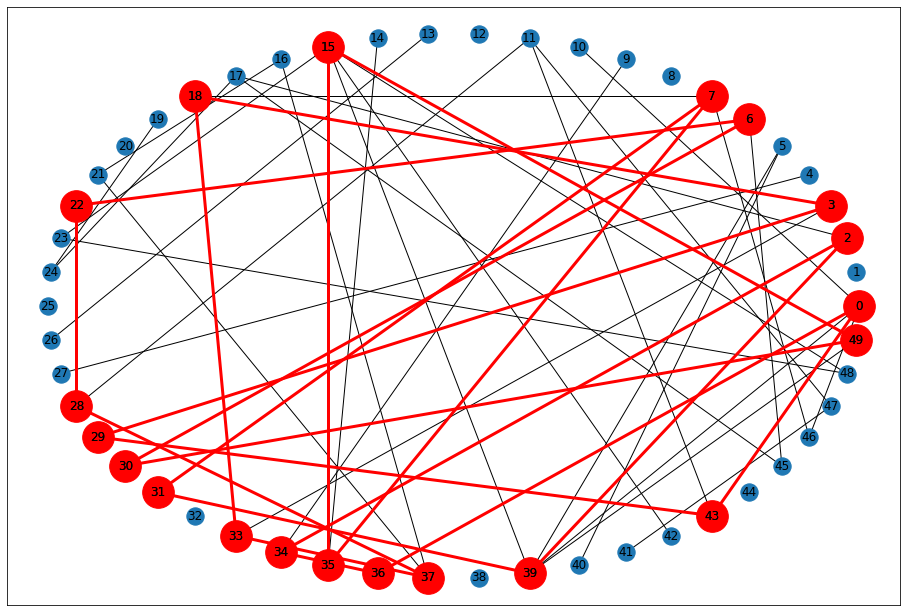

In [167]:
Cycles_graph = nx.Graph()
Cycles_graph.add_edges_from(max_cycles[1])
pos = nx.circular_layout(G) 
nx.draw_networkx(G, pos)
nx.draw_networkx(Cycles_graph, pos, edge_color='r', width = 3, node_color = 'r', node_size = 1000)

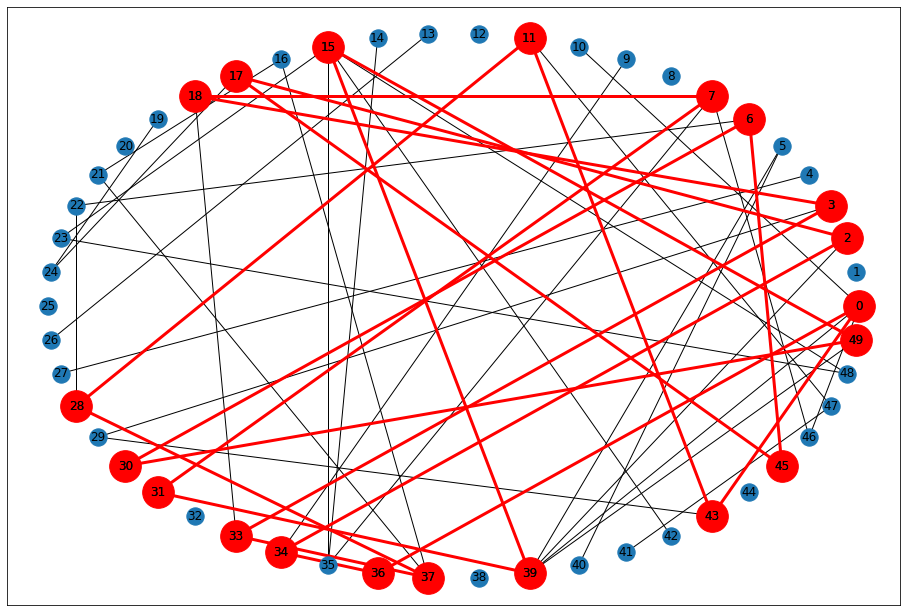

In [168]:
Cycles_graph = nx.Graph()
Cycles_graph.add_edges_from(max_cycles[2])
pos = nx.circular_layout(G) 
nx.draw_networkx(G, pos)
nx.draw_networkx(Cycles_graph, pos, edge_color='r', width = 3, node_color = 'r', node_size = 1000)

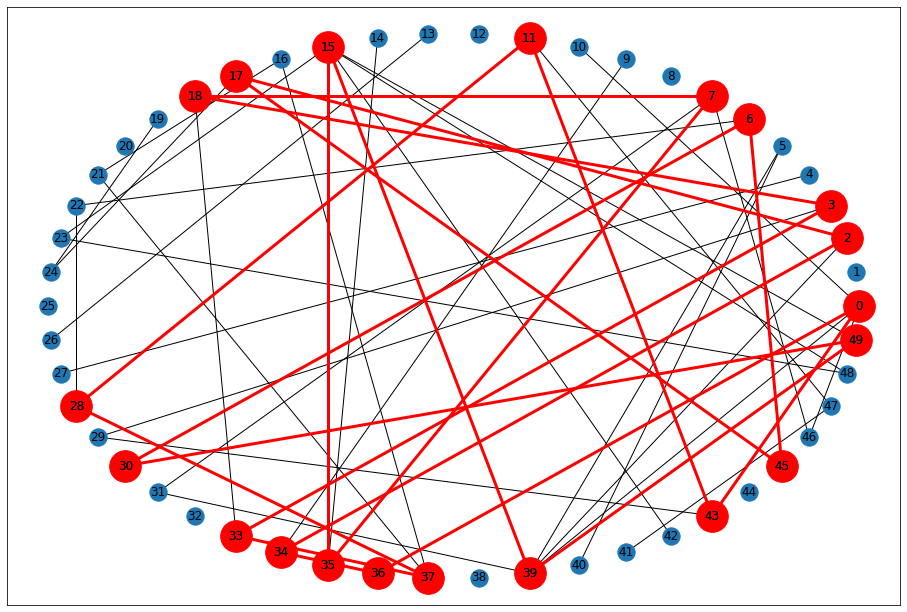

In [169]:
Cycles_graph = nx.Graph()
Cycles_graph.add_edges_from(max_cycles[3])
pos = nx.circular_layout(G) 
nx.draw_networkx(G, pos)
nx.draw_networkx(Cycles_graph, pos, edge_color='r', width = 3, node_color = 'r', node_size = 1000)